In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df = df.drop(['latitude', 'total_rooms', 'ocean_proximity'], axis=1)
df.dropna()
df.reset_index(inplace=True, drop=True)
df = df[df['median_income']>0]
df

,longitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,41.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,21.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,52.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,52.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,52.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,-121.09,25.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,18.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,17.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,18.0,409.0,741.0,349.0,1.8672,84700.0


In [4]:
df.describe()

,longitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,28.639486,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,12.585558,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,1.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,18.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,29.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,52.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Text(0.5, 1.0, 'Correlation between Variables')

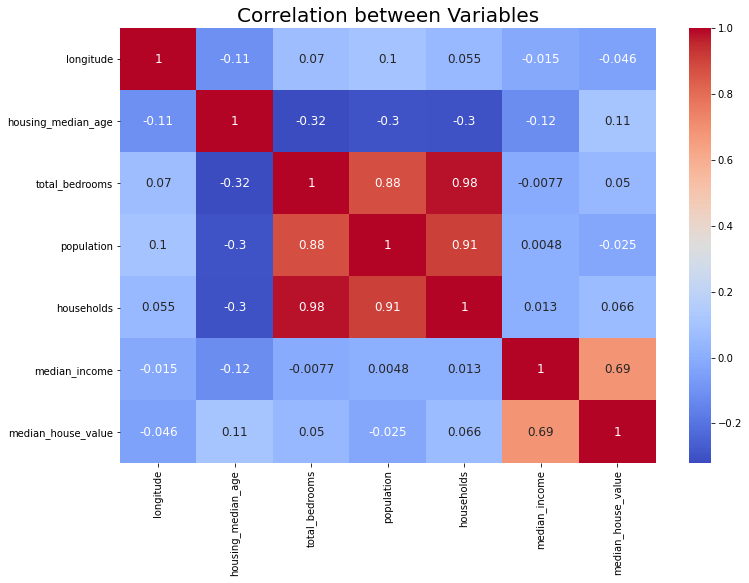

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12,8))
g= sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm', annot_kws={'size':12}) # or greys, coolwarm
ax.set_title('Correlation between Variables', size= 20)

In [6]:
df.dropna()

,longitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,41.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,21.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,52.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,52.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,52.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,-121.09,25.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,18.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,17.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,18.0,409.0,741.0,349.0,1.8672,84700.0


In [10]:
x = df[df.columns[df.columns != 'longitude']]
y = df.longitude
 
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              longitude   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     108.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          9.75e-136
Time:                        00:06:42   Log-Likelihood:                -42870.
No. Observations:               20433   AIC:                         8.575e+04
Df Residuals:                   20426   BIC:                         8.581e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -119.2223      0

In [9]:
df = df.dropna()

In [11]:
x.drop(columns = ['housing_median_age','total_bedrooms', 'population'],axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              longitude   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     42.47
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           2.36e-27
Time:                        00:07:40   Log-Likelihood:                -43129.
No. Observations:               20433   AIC:                         8.627e+04
Df Residuals:                   20429   BIC:                         8.630e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -119.6065      0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.006736495985713353


In [13]:
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
coefficients

,0,0
0,const,0.000000
1,households,0.000300
2,median_income,0.031582
3,median_house_value,-0.000001
